In [2]:
import tensorflow as tf
import tensorflow_meteo as tm

In [3]:
plotter(['clean'])
%matplotlib inline
import matplotlib.pyplot as plt
cmap = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
sess = tf.Session()

# Real Solutions

$$x^2 - 1 + z(7-\alpha x)$$

In [5]:
mod = tm.Model({
    'constants': {
        'alpha': 5.0
    },
    'parameters': {
        'z': 1
    },
    'variables': {
        'x': 1
    },
    'equations': {
        'eq1': 'x**2-1+z*(7-alpha*x)'
    }
})

In [6]:
pars = {'z': 0.0}
var0 = {'x': 5.0}
with sess.as_default():
    var1 = mod.solve_system(pars, var0, output=True)
    ret = mod.eval_system(pars, var1)
    print(var1)
    print(ret)

Initial error = 24.0
Equation Solved (6)
par_val = [ 0.]
var_val = [ 1.]
eqn_val = [ 0.]

{'x': 1.0}
{'eq1': 0.0}


In [7]:
par0 = {'z': 0.0}
par1 = {'z': 1.0}
var0 = {'x': 5.0}
with sess.as_default():
    (t_path, par_path, var_path) = mod.homotopy_bde(par0, par1, var0,
                                                    solve=True, output=True)

Initial error = 24.0
Equation Solved (6)
par_val = [ 0.]
var_val = [ 1.]
eqn_val = [ 0.]

t = 0.0
Equation error = 0.0

Iteration = 0
Step predict = 0.01
Correction steps = 1
t = 0.009849269065139919
Equation error = 2.01574867908505e-15

Iteration = 5
Step predict = 0.008455530808389055
Correction steps = 1
t = 0.054406880132618546
Equation error = 2.4702462297909733e-15

Iteration = 10
Step predict = 0.00686963229234568
Correction steps = 1
t = 0.09100159408980567
Equation error = 1.609823385706477e-15

Iteration = 15
Step predict = 0.005316296364566446
Correction steps = 1
t = 0.1197388124792578
Equation error = 5.551115123125783e-16

Iteration = 20
Step predict = 0.00386164081482998
Correction steps = 1
t = 0.1410600925103373
Equation error = 0.0

Iteration = 25
Step predict = 0.0025519711323268787
Correction steps = 1
t = 0.15564609889393594
Equation error = 1.1102230246251565e-16

Iteration = 30
Step predict = 0.001409742277111595
Correction steps = 1
t = 0.16430631276738808
Equa

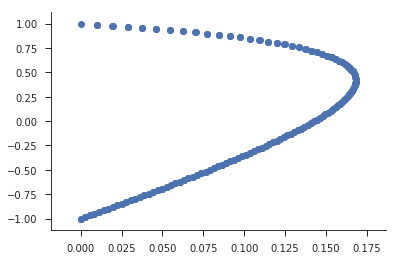

In [8]:
plt.scatter(par_path[:,0], var_path[:,0]);

# Complex Solutions

Real (with ifuzz = $\varepsilon$)
$$x^2 - 1 + z(7-5x) = \varepsilon i$$

Complex
$$a^2 - 1 + z(7-5a) - b^2 = 0$$
$$b(2a-5z) = \varepsilon$$

In [9]:
modc = tm.Model({
    'parameters': {
        'z': 1,
        'eps': 1
    },
    'variables': {
        'a': 1,
        'b': 1
    },
    'equations': {
        'eqr': 'a**2-1+z*(7-5*a)-b**2',
        'eqc': 'b*(2*a-5*z)-eps'
    }
})

In [10]:
pars = {'z': 0.0, 'eps': 0.0}
var0 = {'a': 1.1, 'b': 1.1}
with sess.as_default():
    sess.run(tf.global_variables_initializer())
    var1 = modc.solve_system(pars, var0, output=True)
    ret = modc.eval_system(pars, var1)

Initial error = 2.4200000000000004
Equation Solved (5)
par_val = [ 0.  0.]
var_val = [  1.00000000e+00   1.00557374e-21]
eqn_val = [ -1.01117855e-42   2.01114749e-21]



In [11]:
par0p = {'z': 0.0, 'eps': 0.001}
par1p = {'z': 1.0, 'eps': 0.001}
var0p = {'a': 1.0, 'b': 0.001}
par0n = {'z': 0.0, 'eps': 0.001}
par1n = {'z': 1.0, 'eps': 0.001}
var0n = {'a': -1.0, 'b': 0.001}
with sess.as_default():
    (t_path1, par_path1, var_path1) = modc.homotopy_bde(par0p, par1p, var0p)
    (t_path2, par_path2, var_path2) = modc.homotopy_bde(par0n, par1n, var0n)

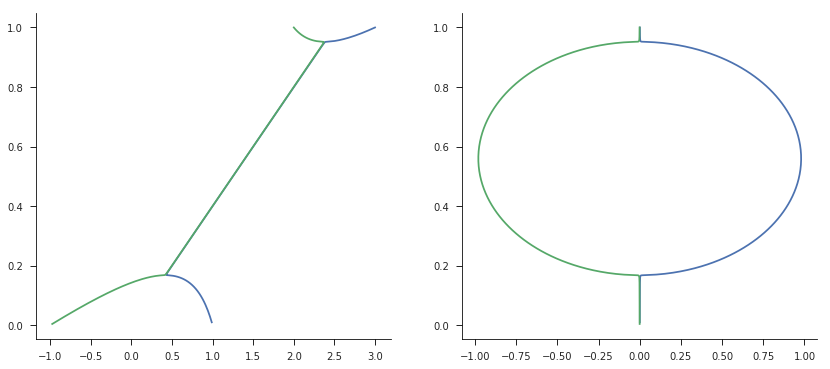

In [12]:
(fig, (ax1, ax2)) = plt.subplots(ncols=2, figsize=(14, 6))
ax1.plot(var_path1[2::2,0], par_path1[2::2,0], c=cmap[0]);
ax1.plot(var_path2[2::2,0], par_path2[2::2,0], c=cmap[1]);
ax2.plot(var_path1[2::2,1], par_path1[2::2,0], c=cmap[0]);
ax2.plot(var_path2[2::2,1], par_path2[2::2,0], c=cmap[1]);